## Notebook 3 - Modeling
### Project 3 | DSI 523 | Adriana J. Machado 
-----

## Table of Contents
### [5.0 Modeling](#5.0-Modeling)
### [5.1 Models](#5.1-Models)
> ### [5.1.1 CountVectorizer and Multinomial Naive Bayes](#5.1.1-CountVectorizer-and-Multinomial-Naive-Bayes)
> ### [5.1.2 CountVectorizer and Logistic Regression](#5.1.2-CountVectorizer-and-Logistic-Regression)
> ### [5.1.3 TFIDF and Multinomial Naive Bayes](#5.1.3-TFIDF-and-Multinomial-Naive-Bayes)
> ### [5.1.4 TFIDF and Logistic Regression](#5.1.4-TFIDF-and-Logistic-Regression)
### [5.2 Model Comparisons](#5.2-Model-Comparisons)
### [5.3 Model Winner](#5.3-Model-Winner)
### [5.4 (Bonus) DecisionTree and VoteSearch](#5.4-(Bonus)-DecisionTree-and-VoteSearch)
-----

# 5.0 Modeling
-----

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

# warnings
import warnings
warnings.simplefilter("ignore")
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

# formatting
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 400

import pickle

In [2]:
%store -r shower_words
%store -r intrusive_words

df = pd.read_csv('../data/intrusive_shower_final.csv')

In [3]:
df.head()

,is_shower,subreddit,created_utc,title,selftext,upvote_ratio,title_token,selftext_token,title_no_stop,selftext_no_stop,title_sent,selftext_sent,overall_sent,title_self
0,0,intrusivethoughts,1656469973,i am extremely scared my left eye is moving slowly downwards on my face,redacted,1.0,"['i', 'am', 'extremely', 'scared', 'my', 'left', 'eye', 'is', 'moving', 'slowly', 'downwards', 'on', 'my', 'face']",['redacted'],"['i', 'am', 'extremely', 'scared', 'my', 'left', 'eye', 'is', 'moving', 'slowly', 'downwards', 'on', 'my', 'face']",['redacted'],-0.4927,0.0000,-0.4927,i am extremely scared my left eye is moving slowly downwards on my face
1,0,intrusivethoughts,1656468826,here's a list of my intrusive thoughts,jump in front of a car run people over go knife happy throw water over electrics shout racial abuse shoot a school up why is my brain doing this to me!!!!! 😢😢😢😢,1.0,"['here', ""'s"", 'a', 'list', 'of', 'my', 'intrusive', 'thoughts']","['jump', 'in', 'front', 'of', 'a', 'car', 'run', 'people', 'over', 'go', 'knife', 'happy', 'throw', 'water', 'over', 'electrics', 'shout', 'racial', 'abuse', 'shoot', 'a', 'school', 'up', 'why', 'is', 'my', 'brain', 'doing', 'this', 'to', 'me', '!!!!!', '😢😢😢😢']","['here', ""'s"", 'a', 'list', 'of', 'my', 'intrusive', 'thoughts']","['jump', 'in', 'front', 'of', 'a', 'car', 'run', 'people', 'over', 'go', 'knife', 'happy', 'throw', 'water', 'over', 'electrics', 'shout', 'racial', 'abuse', 'shoot', 'a', 'school', 'up', 'why', 'is', 'my', 'brain', 'doing', 'this', 'to', 'me', '!!!!!', '😢😢😢😢']",0.0000,-0.6209,-0.6209,here's a list of my intrusive thoughts jump in front of a car run people over go knife happy throw water over electrics shout racial abuse shoot a school up why is my brain doing this to me!!!!! 😢😢😢😢
2,0,intrusivethoughts,1656464538,step on your cat,"i love her so much but....she's just lying there, in the way ... could i crush her scull?",1.0,"['step', 'on', 'your', 'cat']","['i', 'love', 'her', 'so', 'much', 'but', ""....she's"", 'just', 'lying', 'there', ',', 'in', 'the', 'way', '...', 'could', 'i', 'crush', 'her', 'scull', '?']","['step', 'on', 'your', 'cat']","['i', 'love', 'her', 'so', 'much', 'but', ""....she's"", 'just', 'lying', 'there', ',', 'in', 'the', 'way', '...', 'could', 'i', 'crush', 'her', 'scull', '?']",0.0000,0.0516,0.0516,"step on your cat i love her so much but....she's just lying there, in the way ... could i crush her scull?"
3,0,intrusivethoughts,1656459837,intrusive thoughts,are paranoid intrusive thoughts a thing??,1.0,"['intrusive', 'thoughts']","['are', 'paranoid', 'intrusive', 'thoughts', 'a', 'thing', '??']","['intrusive', 'thoughts']","['are', 'paranoid', 'intrusive', 'thoughts', 'a', 'thing', '??']",0.0000,-0.3313,-0.3313,intrusive thoughts are paranoid intrusive thoughts a thing??
4,0,intrusivethoughts,1656458075,bash your head against the painting and cut your eyes out with the glass,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh do it now! do it right fucking now aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh,1.0,"['bash', 'your', 'head', 'against', 'the', 'painting', 'and', 'cut', 'your', 'eyes', 'out', 'with', 'the', 'glass']","['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh', 'do', 'it', 'now', '!', 'do', 'it', 'right', 'fucking', 'now', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh']","['bash', 'your', 'head', 'against', 'the', 'painting', 'and', 'cut', 'your', 'eyes', 'out', 'with', 'the', 'glass']","['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh', 'do', 'it', 'now', '!', 'do', 'it', 'right', 'fucking', 'now', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh']",-0.2732,0.0000,-0.2732,bash your head against the painting and cut your eyes out with the glass aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh do it now! do it right fucking now aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh


### Remove Intrusive and Shower from title_self

In [4]:
df['title_self'] = df['title_self'].str.replace('intrusive', '')
df['title_self'] = df['title_self'].str.replace('shower', '')

In [5]:
df.head()

,is_shower,subreddit,created_utc,title,selftext,upvote_ratio,title_token,selftext_token,title_no_stop,selftext_no_stop,title_sent,selftext_sent,overall_sent,title_self
0,0,intrusivethoughts,1656469973,i am extremely scared my left eye is moving slowly downwards on my face,redacted,1.0,"['i', 'am', 'extremely', 'scared', 'my', 'left', 'eye', 'is', 'moving', 'slowly', 'downwards', 'on', 'my', 'face']",['redacted'],"['i', 'am', 'extremely', 'scared', 'my', 'left', 'eye', 'is', 'moving', 'slowly', 'downwards', 'on', 'my', 'face']",['redacted'],-0.4927,0.0000,-0.4927,i am extremely scared my left eye is moving slowly downwards on my face
1,0,intrusivethoughts,1656468826,here's a list of my intrusive thoughts,jump in front of a car run people over go knife happy throw water over electrics shout racial abuse shoot a school up why is my brain doing this to me!!!!! 😢😢😢😢,1.0,"['here', ""'s"", 'a', 'list', 'of', 'my', 'intrusive', 'thoughts']","['jump', 'in', 'front', 'of', 'a', 'car', 'run', 'people', 'over', 'go', 'knife', 'happy', 'throw', 'water', 'over', 'electrics', 'shout', 'racial', 'abuse', 'shoot', 'a', 'school', 'up', 'why', 'is', 'my', 'brain', 'doing', 'this', 'to', 'me', '!!!!!', '😢😢😢😢']","['here', ""'s"", 'a', 'list', 'of', 'my', 'intrusive', 'thoughts']","['jump', 'in', 'front', 'of', 'a', 'car', 'run', 'people', 'over', 'go', 'knife', 'happy', 'throw', 'water', 'over', 'electrics', 'shout', 'racial', 'abuse', 'shoot', 'a', 'school', 'up', 'why', 'is', 'my', 'brain', 'doing', 'this', 'to', 'me', '!!!!!', '😢😢😢😢']",0.0000,-0.6209,-0.6209,here's a list of my thoughts jump in front of a car run people over go knife happy throw water over electrics shout racial abuse shoot a school up why is my brain doing this to me!!!!! 😢😢😢😢
2,0,intrusivethoughts,1656464538,step on your cat,"i love her so much but....she's just lying there, in the way ... could i crush her scull?",1.0,"['step', 'on', 'your', 'cat']","['i', 'love', 'her', 'so', 'much', 'but', ""....she's"", 'just', 'lying', 'there', ',', 'in', 'the', 'way', '...', 'could', 'i', 'crush', 'her', 'scull', '?']","['step', 'on', 'your', 'cat']","['i', 'love', 'her', 'so', 'much', 'but', ""....she's"", 'just', 'lying', 'there', ',', 'in', 'the', 'way', '...', 'could', 'i', 'crush', 'her', 'scull', '?']",0.0000,0.0516,0.0516,"step on your cat i love her so much but....she's just lying there, in the way ... could i crush her scull?"
3,0,intrusivethoughts,1656459837,intrusive thoughts,are paranoid intrusive thoughts a thing??,1.0,"['intrusive', 'thoughts']","['are', 'paranoid', 'intrusive', 'thoughts', 'a', 'thing', '??']","['intrusive', 'thoughts']","['are', 'paranoid', 'intrusive', 'thoughts', 'a', 'thing', '??']",0.0000,-0.3313,-0.3313,thoughts are paranoid thoughts a thing??
4,0,intrusivethoughts,1656458075,bash your head against the painting and cut your eyes out with the glass,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh do it now! do it right fucking now aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh,1.0,"['bash', 'your', 'head', 'against', 'the', 'painting', 'and', 'cut', 'your', 'eyes', 'out', 'with', 'the', 'glass']","['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh', 'do', 'it', 'now', '!', 'do', 'it', 'right', 'fucking', 'now', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh']","['bash', 'your', 'head', 'against', 'the', 'painting', 'and', 'cut', 'your', 'eyes', 'out', 'with', 'the', 'glass']","['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh', 'do', 'it', 'now', '!', 'do', 'it', 'right', 'fucking', 'now', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh']",-0.2732,0.0000,-0.2732,bash your head against the painting and cut your eyes out with the glass aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh do it now! do it right fucking now aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh


# 5.1 Models
-----
## Adapted from 5.06

In [6]:
# Adapted from Lesson 5.06
# Define X and y
X = df['title_self']
y = df['is_shower']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [7]:
# Baseline?
y.value_counts(normalize = True)

0    0.500501
1    0.499499
Name: is_shower, dtype: float64

## 5.1.1 CountVectorizer and Multinomial Naive Bayes

In [8]:
# Pipeline
pipe_cnb = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())])

In [9]:
# fit
pipe_cnb.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('nb', MultinomialNB())])

In [10]:
# Make predictions
preds_cnb = pipe_cnb.predict(X_test)

In [11]:
# scores
print(f'CVEC & NB Train: {pipe_cnb.score(X_train, y_train)}')
print(f'CVEC & NB Test: {pipe_cnb.score(X_test, y_test)}')

CVEC & NB Train: 0.9332591768631813
CVEC & NB Test: 0.9152768512341561


              precision    recall  f1-score   support

           0       0.91      0.92      0.92       750
           1       0.92      0.91      0.92       749

    accuracy                           0.92      1499
   macro avg       0.92      0.92      0.92      1499
weighted avg       0.92      0.92      0.92      1499



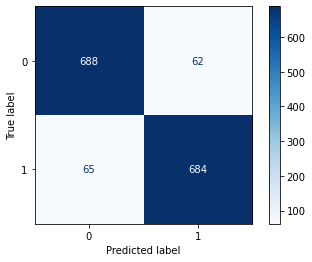

In [12]:
# Classification report
print(classification_report(y_test, preds_cnb))

# Confusion matrix
plot_confusion_matrix(pipe_cnb, X_test, y_test, cmap = 'Blues');

### With GridSearch

In [13]:
# Pipeline
pipe_cnb = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())])

# Parameters
params_cnb = {
    'cvec__ngram_range': [(1, 1), (2, 2)],
    'cvec__stop_words': [None, 'english'],
    
}

#GridSearch
gs_cnb = GridSearchCV(pipe_cnb, params_cnb)
gs_cnb.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__ngram_range': [(1, 1), (2, 2)],
                         'cvec__stop_words': [None, 'english']})

In [14]:
# Scores and Best Params
print(f'CNB Train Score: {gs_cnb.score(X_train, y_train)}')
print(f'CNB Test Score: {gs_cnb.score(X_test, y_test)}')
print(f'CNB Best Params: {gs_cnb.best_params_}')

CNB Train Score: 0.9828698553948833
CNB Test Score: 0.9659773182121414
CNB Best Params: {'cvec__ngram_range': (2, 2), 'cvec__stop_words': None}


In [15]:
# Make predictions
preds_cnb_gs = gs_cnb.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       750
           1       0.97      0.96      0.97       749

    accuracy                           0.97      1499
   macro avg       0.97      0.97      0.97      1499
weighted avg       0.97      0.97      0.97      1499



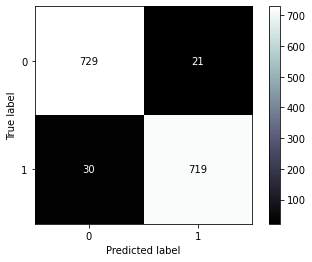

In [16]:
# Classification report
print(classification_report(y_test, preds_cnb_gs))

# Confusion matrix
plot_confusion_matrix(gs_cnb, X_test, y_test, cmap = 'bone');

## 5.1.2 CountVectorizer and Logistic Regression

In [17]:
# Pipeline
pipe_clog = Pipeline([
    ('cvec', CountVectorizer()), 
    ('log', LogisticRegression())])

In [18]:
# fit
pipe_clog.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('log', LogisticRegression())])

In [19]:
# scores
print(f'CVEC & Log Train: {pipe_clog.score(X_train, y_train)}')
print(f'CVEC & Log Test: {pipe_clog.score(X_test, y_test)}')

CVEC & Log Train: 0.9911012235817576
CVEC & Log Test: 0.9372915276851234


In [20]:
# Make predictions
preds_clog = pipe_clog.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.90      0.93       750
           1       0.90      0.98      0.94       749

    accuracy                           0.94      1499
   macro avg       0.94      0.94      0.94      1499
weighted avg       0.94      0.94      0.94      1499



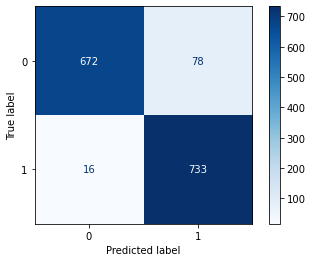

In [21]:
# Classification report
print(classification_report(y_test, preds_clog))

# Confusion matrix
plot_confusion_matrix(pipe_clog, X_test, y_test, cmap = 'Blues');

### With GridSearch

In [22]:
# Pipeline
pipe_clog = Pipeline([
    ('cvec', CountVectorizer()), 
    ('log', LogisticRegression())])

# Parameters
params_clog = {
    'cvec__ngram_range': [(1, 1), (2, 2)],
    'cvec__stop_words': [None, 'english'],
    
}

#GridSearch
gs_clog = GridSearchCV(pipe_clog, params_clog)
gs_clog.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('log', LogisticRegression())]),
             param_grid={'cvec__ngram_range': [(1, 1), (2, 2)],
                         'cvec__stop_words': [None, 'english']})

In [23]:
# Scores and Best Params
print(f'CLog Train Score: {gs_clog.score(X_train, y_train)}')
print(f'CLog Test Score: {gs_clog.score(X_test, y_test)}')
print(f'CLog Best Params: {gs_clog.best_params_}')

CLog Train Score: 0.9919911012235818
CLog Test Score: 0.9606404269513009
CLog Best Params: {'cvec__ngram_range': (2, 2), 'cvec__stop_words': 'english'}


In [24]:
# Make predictions
preds_clog_gs = gs_clog.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       750
           1       0.97      0.95      0.96       749

    accuracy                           0.96      1499
   macro avg       0.96      0.96      0.96      1499
weighted avg       0.96      0.96      0.96      1499



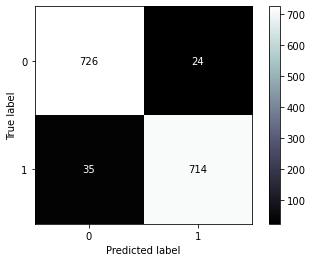

In [25]:
# Classification report
print(classification_report(y_test, preds_clog_gs))

# Confusion matrix
plot_confusion_matrix(gs_clog, X_test, y_test, cmap = 'bone');

## 5.1.3 TFIDF and Multinomial Naive Bayes

In [26]:
# Pipeline
pipe_tnb = Pipeline([
    ('tvec', TfidfVectorizer()), 
    ('nb', MultinomialNB())])

In [27]:
# Fit
pipe_tnb.fit(X_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()), ('nb', MultinomialNB())])

In [28]:
# Scores
print(f'TVEC & NB Train: {pipe_tnb.score(X_train, y_train)}')
print(f'TVEC & NB Test: {pipe_tnb.score(X_test, y_test)}')

TVEC & NB Train: 0.9626251390433815
TVEC & NB Test: 0.9266177451634423


In [29]:
# Make predictions
preds_tnb = pipe_tnb.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       750
           1       0.95      0.90      0.92       749

    accuracy                           0.93      1499
   macro avg       0.93      0.93      0.93      1499
weighted avg       0.93      0.93      0.93      1499



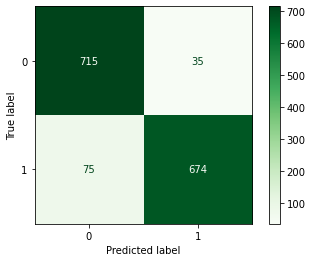

In [30]:
# Classification report
print(classification_report(y_test, preds_tnb))

# Confusion matrix
plot_confusion_matrix(pipe_tnb, X_test, y_test, cmap = 'Greens');

### With GridSearch

In [31]:
# Pipeline
pipe_tnb = Pipeline([
    ('tvec', TfidfVectorizer()), 
    ('nb', MultinomialNB())])

# Parameters
params_tnb = {
    'tvec__ngram_range': [(1, 1), (2, 2)],
    'tvec__stop_words': [None, 'english'],
    
}

#GridSearch
gs_tnb = GridSearchCV(pipe_tnb, params_tnb)
gs_tnb.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__ngram_range': [(1, 1), (2, 2)],
                         'tvec__stop_words': [None, 'english']})

In [32]:
# Scores and Best Params
print(f'TNB Train Score: {gs_tnb.score(X_train, y_train)}')
print(f'TNB Test Score: {gs_tnb.score(X_test, y_test)}')
print(f'TNB Best Params: {gs_tnb.best_params_}')

TNB Train Score: 0.993103448275862
TNB Test Score: 0.9653102068045364
TNB Best Params: {'tvec__ngram_range': (2, 2), 'tvec__stop_words': None}


In [33]:
# Make predictions
preds_tnb_gs = gs_tnb.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       750
           1       0.96      0.97      0.97       749

    accuracy                           0.97      1499
   macro avg       0.97      0.97      0.97      1499
weighted avg       0.97      0.97      0.97      1499



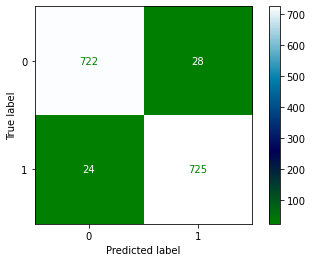

In [34]:
# Classification report
print(classification_report(y_test, preds_tnb_gs))

# Confusion matrix
plot_confusion_matrix(gs_tnb, X_test, y_test, cmap = 'ocean');

## 5.1.4 TFIDF and Logistic Regression

In [35]:
# Pipeline
pipe_tlog = Pipeline([
    ('tvec', TfidfVectorizer()), 
    ('log', LogisticRegression())])

In [36]:
# Fit
pipe_tlog.fit(X_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()), ('log', LogisticRegression())])

In [37]:
# Scores
print(f'TVEC & Log Train: {pipe_tlog.score(X_train, y_train)}')
print(f'TVEC & Log Test: {pipe_tlog.score(X_test, y_test)}')

TVEC & Log Train: 0.9503893214682981
TVEC & Log Test: 0.9206137424949966


In [38]:
# Make predictions
preds_tlog = pipe_tlog.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       750
           1       0.89      0.96      0.92       749

    accuracy                           0.92      1499
   macro avg       0.92      0.92      0.92      1499
weighted avg       0.92      0.92      0.92      1499



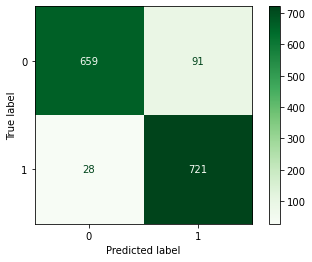

In [39]:
# Classification report
print(classification_report(y_test, preds_tlog))

# Confusion matrix
plot_confusion_matrix(pipe_tlog, X_test, y_test, cmap = 'Greens');

### With GridSearch

In [40]:
# Pipeline
pipe_tlog = Pipeline([
    ('tvec', TfidfVectorizer()), 
    ('log', LogisticRegression())])

# Parameters
params_tlog = {
    'tvec__ngram_range': [(1, 1), (2, 2)],
    'tvec__stop_words': [None, 'english'],
    
}

#GridSearch
gs_tlog = GridSearchCV(pipe_tlog, params_tlog)
gs_tlog.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('log', LogisticRegression())]),
             param_grid={'tvec__ngram_range': [(1, 1), (2, 2)],
                         'tvec__stop_words': [None, 'english']})

In [41]:
# Scores and Best Params
print(f'TLog Train Score: {gs_tlog.score(X_train, y_train)}')
print(f'TLog Test Score: {gs_tlog.score(X_test, y_test)}')
print(f'TLog Best Params: {gs_tlog.best_params_}')

TLog Train Score: 0.9913236929922136
TLog Test Score: 0.9666444296197465
TLog Best Params: {'tvec__ngram_range': (2, 2), 'tvec__stop_words': 'english'}


In [42]:
# Make predictions
preds_tlog_gs = gs_tlog.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       750
           1       0.98      0.95      0.97       749

    accuracy                           0.97      1499
   macro avg       0.97      0.97      0.97      1499
weighted avg       0.97      0.97      0.97      1499



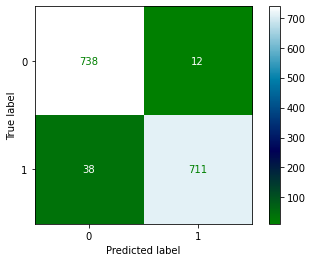

In [43]:
# Classification report
print(classification_report(y_test, preds_tlog_gs))

# Confusion matrix
plot_confusion_matrix(gs_tlog, X_test, y_test, cmap = 'ocean');

# 5.2 Model Comparisons
-----

In [44]:
print('==========\nCountVectorizor & Multinomial Naive Bayes\n==========')
print(f'CNB Train Score: {gs_cnb.score(X_train, y_train)}')
print(f'CNB Test Score: {gs_cnb.score(X_test, y_test)}')
print(f'Train-Test Diff: {gs_cnb.score(X_train, y_train) - gs_cnb.score(X_test, y_test)}')
print(f'CNB Best Params: {gs_cnb.best_params_}')
print('==========\nCountVecotrizer and Logistic Regression\n==========')
print(f'CLog Train Score: {gs_clog.score(X_train, y_train)}')
print(f'CLog Test Score: {gs_clog.score(X_test, y_test)}')
print(f'Train-Test Diff: {gs_clog.score(X_train, y_train) - gs_clog.score(X_test, y_test)}')
print(f'CLog Best Params: {gs_clog.best_params_}')
print('==========\nTFIDF and Multinomial Naive Bayes\n==========')
print(f'TNB Train Score: {gs_tnb.score(X_train, y_train)}')
print(f'TNB Test Score: {gs_tnb.score(X_test, y_test)}')
print(f'Train-Test Diff: {gs_tnb.score(X_train, y_train) - gs_tnb.score(X_test, y_test)}')
print(f'TNB Best Params: {gs_tnb.best_params_}')
print('==========\nTFIDF and Logistic Regression\n==========')
print(f'TLog Train Score: {gs_tlog.score(X_train, y_train)}')
print(f'TLog Test Score: {gs_tlog.score(X_test, y_test)}')
print(f'Train-Test Diff: {gs_tlog.score(X_train, y_train) - gs_tlog.score(X_test, y_test)}')
print(f'TLog Best Params: {gs_tlog.best_params_}')

CountVectorizor & Multinomial Naive Bayes
CNB Train Score: 0.9828698553948833
CNB Test Score: 0.9659773182121414
Train-Test Diff: 0.016892537182741862
CNB Best Params: {'cvec__ngram_range': (2, 2), 'cvec__stop_words': None}
CountVecotrizer and Logistic Regression
CLog Train Score: 0.9919911012235818
CLog Test Score: 0.9606404269513009
Train-Test Diff: 0.03135067427228089
CLog Best Params: {'cvec__ngram_range': (2, 2), 'cvec__stop_words': 'english'}
TFIDF and Multinomial Naive Bayes
TNB Train Score: 0.993103448275862
TNB Test Score: 0.9653102068045364
Train-Test Diff: 0.02779324147132567
TNB Best Params: {'tvec__ngram_range': (2, 2), 'tvec__stop_words': None}
TFIDF and Logistic Regression
TLog Train Score: 0.9913236929922136
TLog Test Score: 0.9666444296197465
Train-Test Diff: 0.024679263372467064
TLog Best Params: {'tvec__ngram_range': (2, 2), 'tvec__stop_words': 'english'}


# 5.3 Model Winner
-----
## CountVectorizer & Multinomial Naive Bayes

In [45]:
print(f'CNB Train Score: {gs_cnb.score(X_train, y_train)}')
print(f'CNB Test Score: {gs_cnb.score(X_test, y_test)}')
print(f'Train-Test Diff: {gs_cnb.score(X_train, y_train) - gs_cnb.score(X_test, y_test)}')
print(f'CNB Best Params: {gs_cnb.best_params_}')

CNB Train Score: 0.9828698553948833
CNB Test Score: 0.9659773182121414
Train-Test Diff: 0.016892537182741862
CNB Best Params: {'cvec__ngram_range': (2, 2), 'cvec__stop_words': None}


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       750
           1       0.97      0.96      0.97       749

    accuracy                           0.97      1499
   macro avg       0.97      0.97      0.97      1499
weighted avg       0.97      0.97      0.97      1499



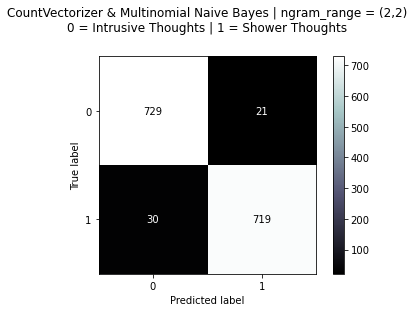

In [47]:
# Classification report
print(classification_report(y_test, preds_cnb_gs))

# Confusion matrix
plot_confusion_matrix(gs_cnb, X_test, y_test, cmap = 'bone')

plt.title('CountVectorizer & Multinomial Naive Bayes | ngram_range = (2,2)\n0 = Intrusive Thoughts | 1 = Shower Thoughts', pad = 25);

plt.savefig('../images/gs_cnb_confusion_matrix.png', dpi = 200, bbox_inches='tight')
plt.savefig('../images/gs_cnb_confusion_matrix.jpeg', dpi = 200, bbox_inches='tight')

In [61]:
train_df = pd.DataFrame(X)
train_df['is_st'] = y
train_df['preds'] = gs_cnb.predict(X)

In [63]:
train_df.to_csv('../data/train_preds.csv', index = False)

In [64]:
# Pickle h_XGB
with open('../models/gs_cnb.pkl', 'wb') as f:
    pickle.dump(gs_cnb, f)

# 5.4 (Bonus) DecisionTree and VoteSearch
-----
## Adapted from Lesson 6.04
### (Didn't do as well as CountVectorizer and Multinomial Naive Bayes)

In [49]:
cvec = CountVectorizer()
cvec.fit(X_train, y_train)
X_train_cvec = cvec.transform(X_train)

In [50]:
vote = VotingClassifier([
    ('tree', DecisionTreeClassifier()),
    ('ada', AdaBoostClassifier()),
    ('gb', GradientBoostingClassifier())
])

vote_params = {
    'ada__n_estimators': [50, 75, 100],
    'gb__n_estimators': [100, 125, 150],
    'tree__max_depth': [None, 5]
}

## uncomment to run

# v_gs = GridSearchCV(vote, param_grid=vote_params, cv = 5)
# v_gs.fit(X_train_cvec, y_train)
# print(v_gs.best_score_)
# v_gs.best_params_